In [14]:
%matplotlib inline
from scipy.optimize import curve_fit
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt


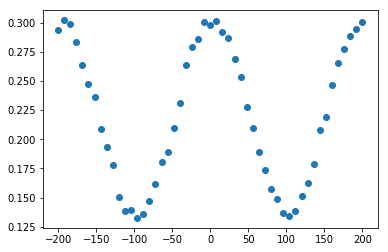

In [15]:
data = np.loadtxt('TD/data/fit_sinus.dat')
data.shape
datax = data[:,0]
datay = data[:,1]
plt.plot(datax, datay, 'o')

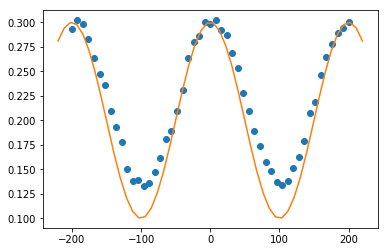

In [19]:
def frange(x, amplitude=0.1, offset=0.2, f_center=0, width=200):
    return offset + amplitude*np.cos(2*pi*(x - f_center)/width)

x_plot = np.linspace(-220, 220)
plt.plot(datax, datay, 'o')
plt.plot(x_plot, frange(x_plot))


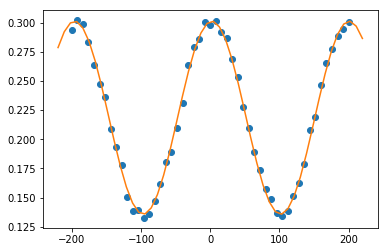

In [23]:
p0 = [.1, .2, 0, 200]
x_plot = np.linspace(-220, 220)
plt.plot(datax, datay, 'o')
#plt.plot(x_plot, frange(x_plot, *p0))

popt, pcov = curve_fit(frange, datax, datay, p0)
plt.plot(x_plot, frange(x_plot, *popt))

In [28]:
print(popt[2])
np.sqrt(pcov[2,2])

2.36767517605


0.31641156138612997

In [29]:
def fit_function(x, a=0, b=2, c=2):
    return a*x**2 + b*x + c

In [31]:
import inspect
args, _, _, defaults = inspect.getargspec(fit_function)

/dd_int/anaconda3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  


In [46]:
def my_curve_fit(fit_function, xdata, ydata, p0={}):
    args, _, _, defaults = inspect.getargspec(fit_function)
    defaults = list(defaults)
    for cle, val in p0.items():
        i = args.index(cle)
        defaults[i-1] = val
    popt, _ = curve_fit(fit_function, xdata, ydata, p0=defaults)
    out = dict(zip(args[1:], popt))
    return out

my_curve_fit(frange, datax, datay, p0={'width':200})['f_center']

/dd_int/anaconda3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  


2.3676751760478263

(0, 2, 2)